<a href="https://colab.research.google.com/github/ngolla/video-captioning/blob/master/preprocessing_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load data from link
# !wget http://www.cs.utexas.edu/users/ml/clamp/videoDescription/YouTubeClips.tar

In [1]:
!pip install scikit-video
#video =skvideo.io.vread('YouTubeClips/-_aaMGK6GGw_57_61.avi')

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [1]:
import math
import cv2
from pathlib import Path
from google.colab import drive
import numpy as np
#import skvideo.io 
import shutil
#from google.colab.patches import cv2_imshow

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   VideoArrays   YouTubeClips.tar


In [3]:
drive_path=Path("/content/drive/My Drive")

In [4]:
list(drive_path.glob('*'))
vid_dim_path=drive_path.joinpath('VideoArrays')
#vid_dim_path.mkdir()

In [5]:
len(list(vid_dim_path.glob('*')))

1969

In [ ]:
filei=vid_dim_path.joinpath('ri5AyXzxb4o_201_215.npy')
numparray=np.load(str())
numparray.shape

Extract videos from the tar file

In [6]:
def tar_to_dir():
  !tar xf "/content/drive/My Drive/YouTubeClips.tar"

In [7]:
pdir=Path('YouTubeClips/')
if pdir.is_dir() and len(list(pdir.glob('*'))) >0 :
  vlen=len(list(pdir.glob('*')))
  print(str(pdir) + ' has all the video files ' + str(vlen))
else:
  tar_to_dir()
  print('Youtube video files created ', len(list(pdir.glob('*'))))

Youtube video files created  1970


In [8]:
#This is to count number of videos in the directory #https://devconnected.com/how-to-count-files-in-directory-on-linux/ reference
#!ls YouTubeClips/ | wc -l

#import os
#video_ids=list(os.listdir(path='YouTubeClips/'))
#print(len(video_ids))

len(list(pdir.glob('*')))

1970

In [28]:
print('A video of videoID -_hbPLsZvvo* has ',len(list(pdir.glob('**/-_hbPLsZvvo*.avi'))),' chunks')
list(pdir.glob('**/-_hbPLsZvvo*.avi'))

A video of videoID -_hbPLsZvvo* has  11  chunks


[PosixPath('YouTubeClips/-_hbPLsZvvo_269_275.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_19_26.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_172_179.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_43_55.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_18_25.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_49_55.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_323_328.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_5_8.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_19_25.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_288_305.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_211_219.avi')]

In [9]:
#Path('frames').mkdir()
frame_dir=Path('frames')
len(list(frame_dir.glob('*')))
#frame_dir.rmdir()

0

#Remove frames directory, since numpy arrays are generated, frames are not necessary

In [10]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
import time
#Defining few variables
img_dim=224 # image height and width 224 by 224
channels=3 # three channesl RGB
batch_size=128 # batch normalization
frames_step=80 # select 80 frames

#load image adjust to the dimensions mentioned
def load_image(path):
    img = cv2.imread(str(path))
    img = cv2.resize(img,(img_dim,img_dim))
    return img

#Transfer learning  using vgg16
def model_cnn_load():
    model = VGG16(weights = "imagenet", include_top=True,input_shape = (img_dim,img_dim,channels))
    out = model.layers[-2].output
    model_final = Model(inputs=model.input,outputs=out)
    return model_final

In [11]:
##It is saving the last frame every second. 
#If frame rate is 30 fps and x = 30 (it is the 30th frame), 
#it saves the image, one second later after another 30 frames, 
#it will once again save the frame. If it were not conditional, 
#it would try to write as many files per second 
#as the stream's fps which generally would clog the pipeline and hurt throughput.
def extract_frames(video_path, v_dir):
    cap = cv2.VideoCapture(video_path)
    frameRate = cap.get(5) #frame rate
    print('frameRate ',frameRate)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        #print('frameId ',frameId)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
          frame_path=v_dir.joinpath(str(int(frameId))+'.jpg')
          #frame_path.touch()
          cv2.imwrite(str(frame_path), frame)
    cap.release()
    cv2.destroyAllWindows()

In [12]:
def remove_dir(frame_dir):
  shutil.rmtree(frame_dir, ignore_errors=True)

In [52]:
video_df=pd.DataFrame(columns=['Name','no_frames', 'rows', 'cols'])

In [13]:
start_pc=time.perf_counter()
start_pt=time.process_time()

In [14]:
#list(pdir.glob('**/*.avi'))
from tqdm import tqdm
import os

In [23]:
processed_files=[x.stem for x in vid_dim_path.glob('*')]
all_files=[x.stem for x in pdir.glob('*')]
unprocess_files=[item for item in all_files if item not in processed_files]

In [24]:
print(len(processed_files))
print(len(all_files))
print(len(unprocess_files))
#print(len(corpusVideoIds))

1970
1970
0


In [18]:
model=model_cnn_load()
def convert_vid_to_numpy(process_file):
  print('Processing video: '+str(item)+" - "+str(item.name) + " - "+ str(item.stem))
  videoName=item.stem
  if(videoName in corpusVideoIds):
    v_dir=frame_dir.joinpath(item.stem)
    v_dir.mkdir(parents=True)
    extract_frames(str(item), v_dir)
    image_list=sorted(v_dir.glob('*.jpg')) #list of sorted key frames
    samples = np.round(np.linspace(0, len(image_list) - 1, frames_step)) #evenly spaced numbers
    image_list = [image_list[int(sample)] for sample in samples] #each sample of linspace
    images = np.zeros((len(image_list), img_dim, img_dim, channels)) # empty image array
    for i in range(len(image_list)):
      img = load_image(image_list[i]) # load immage
      images[i] = img  #save images as list
    images = np.array(images)#convert to array of images
    fc_feats = model.predict(images,batch_size) # predict dense features from model
    img_feats = np.array(fc_feats) # save feature as array
    outfile = vid_dim_path.joinpath(item.stem+'.npy')
    np.save(str(outfile), img_feats) #save as file
    remove_dir(v_dir) # remove video directory as we got numpy 


553467904/553467096 [==============================] - 4s 0us/step


In [19]:
process_count=0
for item in tqdm(pdir.glob('**/*.avi')):
  if(item.stem in unprocess_files):
    convert_vid_to_numpy(item)
    process_count=process_count+1
#shutil.rmtree(frame_dir, ignore_errors=True)
print('Total number of videos processed '+str(process_count))

0it [00:00, ?it/s]

Processing video: YouTubeClips/jbzaMtPYtl8_48_58.avi - jbzaMtPYtl8_48_58.avi - jbzaMtPYtl8_48_58
frameRate  29.97002997002997


1970it [00:28, 68.23it/s]

Total number of videos processed 1


In [20]:
end_pc=time.perf_counter()
end_pt=time.process_time()

In [21]:
print(' Time taken to perf counter ', str(end_pc-start_pc))
print(' Time taken to process time ', str(end_pt-start_pt))

 Time taken to perf counter  165.35075651699998
 Time taken to process time  60.722307573


In [38]:
import time
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize

model = VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [47]:
for item in pdir.glob('**/*.avi'):
  print('Processing video: '+str(item)+' - '+str(item.name)+' - '+str(item.stem))
  process_each_video(str(item))
  break

Processing video: YouTubeClips/WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98
frame: 0 | prediction: Petri_dish82.06
frame: 10 | prediction: Petri_dish97.08
frame: 20 | prediction: Petri_dish59.88
frame: 30 | prediction: Petri_dish70.84
frame: 40 | prediction: Petri_dish39.61
frame: 50 | prediction: Petri_dish43.90
frame: 60 | prediction: Petri_dish20.29
frame: 70 | prediction: Petri_dish41.40
frame: 80 | prediction: Petri_dish99.33
frame: 90 | prediction: Dandie_Dinmont29.15
frame: 100 | prediction: Dandie_Dinmont33.05
frame: 110 | prediction: Dandie_Dinmont18.68


In [46]:
def process_each_video(video_path):
  videodata = skvideo.io.vread(video_path)
  N_frames, rows, cols, channels = videodata.shape
  video_df.append([video_path,N_frames, rows, cols])
  input_rows, input_cols = (224, 224)
  Img = np.zeros((input_rows, input_cols, channels), np.uint8)
  horz_scaling = input_cols/cols
  rz_rows = int(rows * horz_scaling)
  rz_cols = input_cols
  nb_blank_rows = input_rows - rz_rows
  blank_height = nb_blank_rows // 2
  for eachFrame in range(N_frames):
    if eachFrame%10==0: # let's skip some of the frames, reading only every 10th
      imgnumb = str(eachFrame).zfill(4)
      # get the current frame and resize
      Input = videodata[eachFrame,:,:,:] # shape = (480, 854, 3)
      Input = resize(Input, (rz_rows, rz_cols, channels))
        
      # resize made the image a float, so convert back to uint8
      maxval = np.max(Input)
      Input /= maxval
      Input *= 255
      Input = Input.astype(np.uint8)
        
      # insert the frame image into the blank square image
      Img[blank_height:blank_height+rz_rows, :] = Input
      # input the frame data into the model and get the classification result
      Input = np.expand_dims(Img, axis=0)
      # image pixel values need to normalized the same way as the ImageNet training data the model was trained on
      Input = preprocess_input(Input)
      pred = model.predict(Input)
      label = decode_predictions(pred)
      label = label[0][0]
      print(f'frame: {eachFrame} | prediction: {label[1] }{label[2]*100:0.2f}')

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize
import custom_plots

model = VGG16()
print(model.summary())



In [ ]:
def extract_dense_features(video):
  videogen = skvideo.io.vread(video)
  videometadata = skvideo.io.ffprobe(video)['video'] #key-value dictionary that has video details
  rate = np.int(eval(videometadata['@avg_frame_rate'])) #frame rate i.e., no of frames per second ex: 30 frames per sec.
  total_frames, rows, cols, channels = videogen.shape
  print("Shape: of video: ",videogen.shape,' avg framerate: ', rate, ' number of frames: ', total_frames)
  input_rows, input_cols=(224, 224)
  frameImage = np.zeros((input_rows, input_cols, channels), np.uint8)
  horz_scaling = input_cols/cols
  rz_rows = int(rows * horz_scaling)
  rz_cols = input_cols
  nb_blank_rows = input_rows - rz_rows
  blank_height = nb_blank_rows // 2 #similar to math.floor(blankrows/2)
  print(horz_scaling, ' ', rz_rows, '  ', rz_cols, '  ', nb_blank_rows, '  ', blank_height)
  print(frameImage.shape)
  #for eachFrame in range(total_frames):
  #  if eachFrame%rate==0:
  frame=videogen[0]
  print(frame.shape)
  frame = resize(frame, (rz_rows, rz_cols, channels))
  print(frame.shape)
  # resize made the image a float, so convert back to uint8
  maxval = np.max(frame)
  print(maxval)
  frame /= maxval
  print(frame.shape)
  frame *= 255
  print(frame)
  frame = frame.astype(np.uint8)

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
extract_dense_features(video)

Shape: of video:  (421, 480, 640, 3)  avg framerate:  30  number of frames:  421
0.35   168    224    56    28
(224, 224, 3)
(480, 640, 3)
(168, 224, 3)
1.0
(168, 224, 3)
[[[130.37244898 147.37244898 167.37244898]
  [124.65816327 141.60204082 161.60204082]
  [184.35714286 196.83163265 211.61734694]
  ...
  [188.92857143 231.07142857 253.        ]
  [176.66836735 224.75510204 248.54081633]
  [131.53571429 179.67346939 215.52040816]]

 [[106.32653061 123.32653061 143.32653061]
  [115.71428571 132.71428571 152.71428571]
  [189.64285714 202.57653061 217.08163265]
  ...
  [167.98469388 202.47959184 231.05102041]
  [165.74489796 202.43367347 230.31122449]
  [125.54081633 161.88265306 195.54081633]]

 [[122.06632653 134.78061224 153.1377551 ]
  [106.32142857 119.54081633 137.89795918]
  [134.85204082 150.26530612 167.39285714]
  ...
  [112.02040816 142.60714286 176.30612245]
  [124.57653061 154.14795918 180.93877551]
  [132.16326531 162.52040816 183.54591837]]

 ...

 [[ 11.          16.     

In [ ]:
model=model_cnn_load()

553467904/553467096 [==============================] - 13s 0us/step


video.shape ##ndarray of dimension (T, M, N, C), where T is the number of frames, M is the height, N is width, and C is depth.
vid_in = skvideo.io.FFmpegReader('YouTubeClips/-_aaMGK6GGw_57_61.avi')
data = skvideo.io.ffprobe('YouTubeClips/-_aaMGK6GGw_57_61.avi')['video']
rate = data[vid_in.INFO_AVERAGE_FRAMERATE]
T = np.int(data[vid_in.INFO_NB_FRAMES])

In [ ]:
vid_out = skvideo.io.FFmpegWriter('YouTubeClips/ri5AyXzxb4o_201_215.avi', inputdict={
      '-r': rate,
    },
    outputdict={
      '-vcodec': 'libx264',
      '-pix_fmt': 'yuv420p',
      '-r': rate,
})

https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#ggaeb8dd9c89c10a5c63c139bf7c4f5704da7c2fa550ba270713fca1405397b90ae0

 cv::CAP_PROP_POS_FRAMES =1,
  cv::CAP_PROP_POS_AVI_RATIO =2,
  cv::CAP_PROP_FRAME_WIDTH =3,
  cv::CAP_PROP_FRAME_HEIGHT =4,
  cv::CAP_PROP_FPS =5,

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
extract_frames(video)

frameRate  30.0
selected  0.0
selected  30.0
selected  60.0
selected  90.0
selected  120.0
selected  150.0
selected  180.0
selected  210.0
selected  240.0
selected  270.0
selected  300.0
selected  330.0
selected  360.0
selected  390.0
selected  420.0


In [ ]:

videogen = skvideo.io.vread(video)
videometadata = skvideo.io.ffprobe(video)['video']

In [ ]:

int(eval(videometadata['@avg_frame_rate']))


30

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
videogen = skvideo.io.vread(video)
videometadata = skvideo.io.ffprobe(video)
frame_rate = int(eval(videometadata['video']['@avg_frame_rate']))
num_frames = np.int(videometadata['video']['@nb_frames'])
print(num_frames)
print(frame_rate)
for i in range(0,num_frames): 
  if(i%frame_rate==0):
    frame = cv2.cvtColor(videogen[i],cv2.COLOR_BGR2RGB) #this code do color conversion
    filename=str(frame_dir)+'\\'+str(i)+".jpg"
    cv2.imwrite(filename,frame)
    #cv2_imshow(videogen[i])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

421
30


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize

from sys import path as spath
spath.append('/kaggle/input')
import custom_plots

model = VGG16()
print(model.summary())

infile = '/kaggle/input/llama.mp4'
videodata = skvideo.io.vread(infile)
N_frames, rows, cols, channels = videodata.shape
# The image must be 224x224 pixels in order to input to the model, but our image is not
# square. Solution: Create a blank (all-zeros) image, resize the width of our image to 224, and the
# resize the height by the same factor used to resize the width. Then place this into the blank,
# square one. There will be black bars at the top and bottom of the square input image because our
# frame width is greater than its height, but this will not affect our classifier.
input_rows, input_cols = (224, 224)
Img = np.zeros((input_rows, input_cols, channels), np.uint8)
horz_scaling = input_cols/cols
rz_rows = int(rows * horz_scaling)
rz_cols = input_cols
nb_blank_rows = input_rows - rz_rows
blank_height = nb_blank_rows // 2

for iframe in range(N_frames):
    if iframe%10==0: # let's skip some of the frames, reading only every 10th
        imgnumb = str(iframe).zfill(4)
        
        # get the current frame and resize
        Input = videodata[iframe,:,:,:] # shape = (480, 854, 3)
        Input = resize(Input, (rz_rows, rz_cols, channels))
        
        # resize made the image a float, so convert back to uint8
        maxval = np.max(Input)
        Input /= maxval
        Input *= 255
        Input = Input.astype(np.uint8)
        
        # insert the frame image into the blank square image
        Img[blank_height:blank_height+rz_rows, :] = Input
        
        # optional - show the frames
        custom_plots.show_img(Img, imgnumb, pause=True)
        
        # input the frame data into the model and get the classification result
        Input = np.expand_dims(Img, axis=0)
        # image pixel values need to normalized the same way as the ImageNet training data the model was trained on
        Input = preprocess_input(Input)
        pred = model.predict(Input)
        label = decode_predictions(pred)
        label = label[0][0]
        print(f'frame: {iframe} | prediction: {label[1] }{label[2]*100:0.2f}')

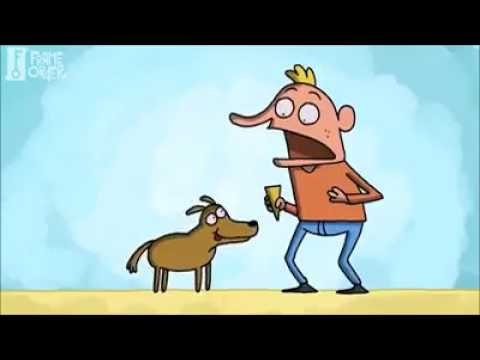

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('EsceiAe1B6w')

Can use later as a 
Reference : https://colab.research.google.com/drive/1l09j_Yv3H016EqHyrJUe_0mNah1M80qf


Some good articles:
Simple code to ope drive files in colab
https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674

STREAM SELECTION                                                 
       By default, ffmpeg includes only one stream of each type  
       (video, audio, subtitle) present in the input files and   
       adds them to each output file.  It picks the "best" of    
       each based upon the following criteria: for video, it is  
       the stream with the highest resolution, for audio, it is  
       the stream with the most channels, for subtitles, it is   
       the first subtitle stream. In the case where several      
       streams of the same type rate equally, the stream with the
       lowest index is chosen.

r_frame_rate is "the lowest framerate with which all timestamps can be represented accurately (it is the least common multiple of all framerates in the stream)."

avg_frame_rate is just that: total duration / total # of frames

You can just specify -r 30000/1001 to maintain the average rate (near-abouts). You don't specify which format you're outputting to, but for MP4, ffmpeg defaults to constant-frame rate, where it picks r_frame_rate as the value. It will then duplicate or drop frames to keep that rate. Use -vsync vfr to keep the variable rate.

https://stackoverflow.com/questions/42798634/extracting-keyframes-python-opencv

In [ ]:
import cv2
import numpy as np

video_path = "/Users/anmoluppal/Downloads/SampleVideo_1280x720_1mb.mp4"
p_frame_thresh = 300000 # You may need to adjust this threshold

cap = cv2.VideoCapture(video_path)
# Read the first frame.
ret, prev_frame = cap.read()

while ret:
    ret, curr_frame = cap.read()

    if ret:
        diff = cv2.absdiff(curr_frame, prev_frame)
        non_zero_count = np.count_nonzero(diff)
        if non_zero_count > p_frame_thresh:
            print "Got P-Frame"
        prev_frame = curr_frame

#Text preprocessing


In [19]:
import pandas as pd


In [20]:
def load_csv(file_name):
  drive_path=Path("/content/drive/My Drive")
  corpus_file=drive_path.joinpath(file_name)
  if(corpus_file.is_file()):
    corpus_df=pd.read_csv(str(corpus_file))
  else:
    uploaded=files.upload()
    corpus_df=pd.read_csv(io.BytesIO(uploaded[file_name]))
    corpus_df.to_csv(corpus_file)
  return corpus_df

In [21]:
annotations=load_csv('video_corpus.csv')

In [22]:
english_ants=annotations[annotations['Language']=='English']
english_ants=english_ants.drop(columns='Unnamed: 0')

In [23]:
cols = ['VideoID', 'Start', 'End']
print(english_ants.groupby(by=cols)['Description'].count()) #Total number of corpus text for each video chunk
print(english_ants.groupby(by='VideoID')['Description'].count() )

VideoID      Start  End
-4wsuPCjDBc  5      15     29
-7KMZQEsJW4  205    208    42
-8rBYNP0UKM  50     82     52
             194    201    56
-8y1Q0rA3n8  95     102    27
                           ..
zulPFoY64wE  26     33     34
zv2RIbUsnSw  159    162    25
             335    341    28
zxB4dFJhHR8  1      9      53
zzit5b_-ukg  5      20     41
Name: Description, Length: 2088, dtype: int64
VideoID
-4wsuPCjDBc     29
-7KMZQEsJW4     42
-8rBYNP0UKM    108
-8y1Q0rA3n8     59
-9CUm-2cui8     28
              ... 
zuYZ5kPatJE     45
zulPFoY64wE     34
zv2RIbUsnSw     53
zxB4dFJhHR8     53
zzit5b_-ukg     41
Name: Description, Length: 1586, dtype: int64


In [24]:
def merge_rows(cols,df):
  df=df.assign(AnnotationID=df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1))
  return df

In [25]:
english_ants=merge_rows(cols,english_ants)
corpusVideoIds=english_ants['AnnotationID'].unique()
len(corpusVideoIds)

2088